<a href="https://colab.research.google.com/github/ayush100497/ayush100497/blob/main/Copy_of_Self_Project_Linear_Regression_(Car_Dekho).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## <b> CarDekho.com is India's leading car search venture that helps users buy cars that are right for them. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. The company has tie-ups with many auto manufacturers, more than 4000 car dealers and numerous financial institutions to facilitate the purchase of vehicles.

## <b> CarDekho.com has launched many innovative features to ensure that users get an immersive experience of the car model before visiting a dealer showroom. These include a Feel The Car tool that gives 360-degree interior/exterior views with sounds of the car and explanations of features with videos; search and comparison by make, model, price, features; and live offers and promotions in all cities. The platform also has used car classifieds wherein users can upload their cars for sale, and find used cars for buying from individuals and used car dealers.

## <b> Besides the above consumer product features, CarDekho.com provides a rich array of tech-enabled tools to OE manufacturers and car dealers. These include apps for dealer sales executives to manage leads, cloud services for tracking sales performance, call tracker solution, digital marketing support, virtual online showroom and outsourced lead management operational process for taking consumers from enquiry to sale.

## <b> Our vision is to construct a complete ecosystem for consumers and car manufacturers, dealers and related businesses such that consumers have easy and complete access to not only buying and selling cars, but also manage their entire ownership experience, be it accessories, tyres, batteries, insurance or roadside assistance. </b>

## <b>In this project, the dataset contains information about used cars listed on www.cardekho.com. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.</b>

## <b>The columns in the given dataset are as follows:</b>

- ### name
- ### year
- ### selling_price
- ### km_driven
- ### fuel
- ### seller_type
- ### transmission
- ### Owner

## <b>Load up this dataset in the kernel and perform initial exploratory data analysis (EDA). You should also try creating new features based on the existing ones. The dependent variable is the <code>selling_price</code>. 

## <b> Your task is to build a linear regression model on this dataset (always split into train and test). Evaluate the fitted model on test data using different regression metrics. Also use your linear regression model from <code>statsmodels.api</code> to run a similar regression and obtain parameter inferences for each of the model variables. Next, you need to try if regularizing your model helps you perform well on the test dataset. For this, use <code> Ridge</code> and <code>Lasso</code> regressions on the dataset and check for different values of the tuning parameter ($\lambda$ or $\alpha$ , do not confuse this $\alpha$ with the learning rate.) For each of the above regressions, get the feature importances using the regression coefficients.

## <b><u> Few things to keep in mind :</u>
* ### You should take care of categorical variables (variables which take discrete categories or classes) and do one-hot encoding to be able to pass them into the model.
* ### Try to include as many plots and charts you can. This adds for a great visual interpretation of your tasks/activities.
* ### Write detailed explanation of your approaches in the notebook and once you have some results, try to provide explanations for these observed results. Remember our objective is not only to build a machine learning model but to be able to explain why, what and how of the entire modeling process.

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Self project linear reg/CAR DETAILS FROM CAR DEKHO.csv')
# # Importing the dataset
car_details_df = pd.read_csv('/content/drive/MyDrive/Self project linear reg/Car details v3.csv')
# # Importing the dataset
car_data_df = pd.read_csv('/content/drive/MyDrive/Self project linear reg/car data.csv')

In [ ]:
# First look
dataset.head()
#Finding the unique values and variants acc to fuel
dataset[dataset['name'].str.contains("LXI")]['fuel'].unique()
#check null values of each column after string split of col Name
print('\nNull Values By columns\n',dataset['name'].str.split(expand = True).isna().sum())
dataset[['Company_make','variant','Model','F1','F2','F3','F4','F5','F6','F7']] = dataset['name'].str.split(expand = True)
#As wagon R are two separate names we will replace that particular names.
dataset['variant'].replace({"Wagon":"Wagon R"}, inplace = True)
dataset['Model'].replace({'R':''},inplace = True)
#after split we gather the required cols and delete pending cols
dataset = dataset.drop(['Model','F1','F2','F3','F4','F5','F6','F7'], axis =1)



Null Values By columns
 0       0
1       0
2       1
3     770
4    2235
5    3336
6    3977
7    4251
8    4302
9    4339
dtype: int64


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
 8   Company_make   4340 non-null   object
 9   variant        4340 non-null   object
dtypes: int64(3), object(7)
memory usage: 339.2+ KB


In [ ]:
#Check unique values of each col
dataset.nunique()

name             1491
year               27
selling_price     445
km_driven         770
fuel                5
seller_type         3
transmission        2
owner               5
Company_make       29
variant           185
dtype: int64

In [ ]:
# duplicates removed
print('Duplicates:',len(dataset[dataset.duplicated()]))
dataset_nodup = dataset.drop_duplicates()

Duplicates: 763


In [ ]:
dataset


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Company_make,variant
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon R
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze
...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai,i20
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai,i20
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti,800
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai,Creta


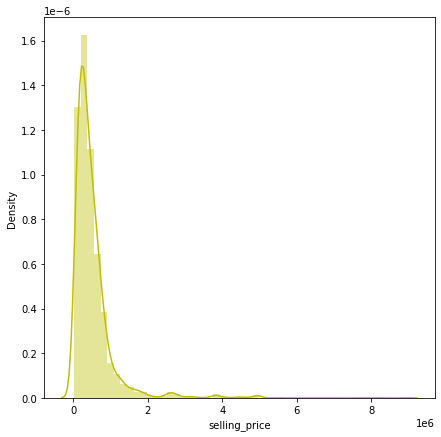

In [ ]:
# Dependent variable selling price
plt.figure(figsize=(7,7))
sns.distplot(dataset['selling_price'],color="y")

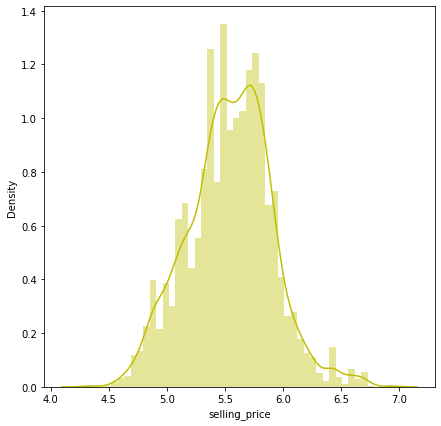

In [ ]:
# Dependent variable plot using log to get normal distribution
plt.figure(figsize=(7,7))
sns.distplot(np.log10(dataset['selling_price']),color="y")

In [ ]:
numeric_features = dataset.describe().columns
dataset[numeric_features]

,year,selling_price,km_driven
0,2007,60000,70000
1,2007,135000,50000
2,2012,600000,100000
3,2017,250000,46000
4,2014,450000,141000
...,...,...,...
4335,2014,409999,80000
4336,2014,409999,80000
4337,2009,110000,83000
4338,2016,865000,90000


In [ ]:
#@title Default title text
# plot a bar plot for each numerical feature count except year

for col in numeric_features[::]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()


"\nfor col in numeric_features[::]:\n    fig = plt.figure(figsize=(9, 6))\n    ax = fig.gca()\n    feature = dataset[col]\n    feature.hist(bins=50, ax = ax)\n    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)\n    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    \n    ax.set_title(col)\nplt.show()"

In [ ]:
#@title Default title text
# plot a log bar plot for each numerical feature count except year

for col in numeric_features[::]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.log10(dataset[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

"\nfor col in numeric_features[::]:\n    fig = plt.figure(figsize=(9, 6))\n    ax = fig.gca()\n    feature = np.log10(dataset[col])\n    feature.hist(bins=50, ax = ax)\n    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)\n    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    \n    ax.set_title(col)\nplt.show()"

In [ ]:
#Performaing a correlation analysis of price with the numeric features

for col in numeric_features[::]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['selling_price']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('selling_price')
    ax.set_title('selling_price vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['selling_price'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()



'\nfor col in numeric_features[::]:\n    fig = plt.figure(figsize=(9, 6))\n    ax = fig.gca()\n    feature = dataset[col]\n    label = dataset[\'selling_price\']\n    correlation = feature.corr(label)\n    plt.scatter(x=feature, y=label)\n    plt.xlabel(col)\n    plt.ylabel(\'selling_price\')\n    ax.set_title(\'selling_price vs \' + col + \'- correlation: \' + str(correlation))\n    z = np.polyfit(dataset[col], dataset[\'selling_price\'], 1)\n    y_hat = np.poly1d(z)(dataset[col])\n\n    plt.plot(dataset[col], y_hat, "r--", lw=1)\n\nplt.show()'

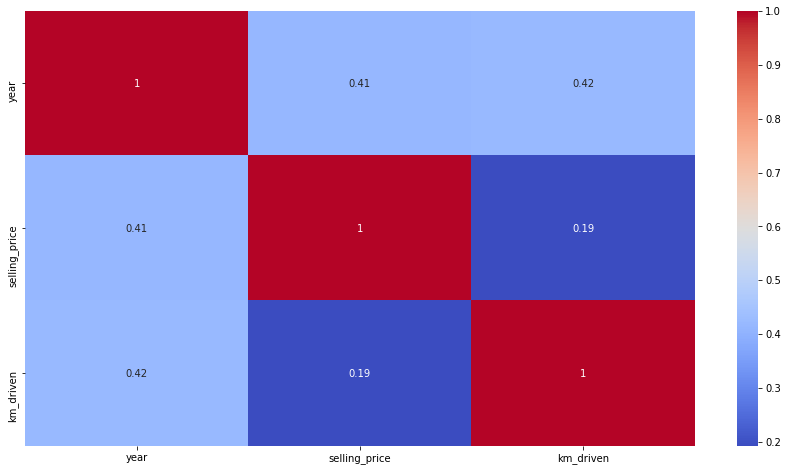

In [ ]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')



In [ ]:
#Total unique car variants and models
print('\nTotal unique cars',dataset['name'].nunique(),'\n')
print(dataset['name'].unique())
#number of companies
print('\n\nNumber of car manufacturing companies',dataset['Company_make'].nunique(),'\n')
print(dataset['Company_make'].unique())
#print the variants of cars
print('\n\n\nTotal variants of car',dataset['variant'].nunique(),'\n')
print(dataset['variant'].unique())


Total unique cars 1491 

['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']


Number of car manufacturing companies 29 

['Maruti' 'Hyundai' 'Datsun' 'Honda' 'Tata' 'Chevrolet' 'Toyota' 'Jaguar'
 'Mercedes-Benz' 'Audi' 'Skoda' 'Jeep' 'BMW' 'Mahindra' 'Ford' 'Nissan'
 'Renault' 'Fiat' 'Volkswagen' 'Volvo' 'Mitsubishi' 'Land' 'Daewoo' 'MG'
 'Force' 'Isuzu' 'OpelCorsa' 'Ambassador' 'Kia']



Total variants of car 185 

['800' 'Wagon R' 'Verna' 'RediGO' 'Amaze' 'Alto' 'Xcent' 'Indigo' 'Creta'
 'Celerio' 'Sail' 'Corolla' 'Ciaz' 'Venue' 'Enjoy' 'XF' 'New' 'Vitara'
 'Q5' 'City' 'Tigor' 'A6' 'Superb' 'Innova' 'Compass' 'E-Class' 'i10' '3'
 'Q7' 'Elantra' 'Scorpio' 'Santro' 'Grand' 'Swift' 'Eeco' 'i20' 'Omni'
 'Jeep' 'Indica' 'EON' 'Etios' 'Tavera' 'EcoSport' 'Civic' 'Rapid' 'Getz'
 'Terrano' 'Elite' 'Brio' 'S-Class' 'XUV500' 'Duster' 'Bolero' 'Avventura'
 'A8' 'Je

In [ ]:
#assig unique cars values
dataset['car'] = dataset['Company_make']+ " " +dataset['variant']
unique_cars = dataset['car'].value_counts()
unique_cars = unique_cars.reset_index()
unique_cars['assigned_car_values'] = pd.DataFrame(unique_cars['index'].index.values)
unique_cars.columns = ['car', 'Count','assigned_car_values']
dataset['car']
dataset = dataset.merge(unique_cars,on = 'car', how ='left')

In [ ]:
#assigning variant values
unique_variant = dataset['variant'].value_counts()
unique_variant = unique_variant.reset_index()
unique_variant['assigned_variant_values'] = pd.DataFrame(unique_variant['index'].index.values)
unique_variant
unique_variant.columns = ['variant', 'Count','assigned_variant_values']
unique_variant
dataset = dataset.merge(unique_variant,on = 'variant', how = 'left')

In [ ]:
#assign companies values
unique_company_make = dataset['Company_make'].value_counts()
unique_company_make = unique_company_make.reset_index()
unique_company_make['assigned_company_make_values'] = pd.DataFrame(unique_company_make['index'].index.values)
unique_company_make
unique_company_make.columns = ['Company_make', 'Count','assigned_company_make_values']
unique_company_make
dataset = dataset.merge(unique_company_make,on = 'Company_make', how ='left')

In [ ]:
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Company_make,variant,car,Count_x,assigned_car_values,Count_y,assigned_variant_values,Count,assigned_company_make_values
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800,Maruti 800,59,20,59,20,1280,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon R,Maruti Wagon R,164,2,164,2,1280,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna,Hyundai Verna,129,4,129,4,821,1
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO,Datsun RediGO,15,70,15,70,37,14
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze,Honda Amaze,58,22,58,22,252,4


In [ ]:
dataset.corr()

,year,selling_price,km_driven,Count_x,assigned_car_values,Count_y,assigned_variant_values,Count,assigned_company_make_values
year,1.000000,0.413922,-0.419688,-0.030974,0.051538,-0.031417,0.057284,-0.087634,0.070124
selling_price,0.413922,1.000000,-0.192289,-0.199410,0.335210,-0.198966,0.327365,-0.267996,0.387475
km_driven,-0.419688,-0.192289,1.000000,0.014619,-0.034941,0.014756,-0.036437,-0.080541,0.023103
Count_x,-0.030974,-0.199410,0.014619,1.000000,-0.648224,0.999541,-0.650103,0.615802,-0.485819
assigned_car_values,0.051538,0.335210,-0.034941,-0.648224,1.000000,-0.645484,0.989154,-0.461247,0.570949
Count_y,-0.031417,-0.198966,0.014756,0.999541,-0.645484,1.000000,-0.651274,0.615620,-0.484144
assigned_variant_values,0.057284,0.327365,-0.036437,-0.650103,0.989154,-0.651274,1.000000,-0.461285,0.559822
Count,-0.087634,-0.267996,-0.080541,0.615802,-0.461247,0.615620,-0.461285,1.000000,-0.794779
assigned_company_make_values,0.070124,0.387475,0.023103,-0.485819,0.570949,-0.484144,0.559822,-0.794779,1.000000


In [ ]:
#get all the categorical features
categorical_features = dataset.describe(include=['object','category']).columns
categorical_features

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'Company_make',
       'variant', 'car'],
      dtype='object')

In [ ]:
#plot categorical features
for col in categorical_features:
    counts = dataset[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

'for col in categorical_features:\n    counts = dataset[col].value_counts().sort_index()\n    fig = plt.figure(figsize=(9, 6))\n    ax = fig.gca()\n    counts.plot.bar(ax = ax, color=\'steelblue\')\n    ax.set_title(col + \' counts\')\n    ax.set_xlabel(col) \n    ax.set_ylabel("Frequency")\nplt.show()'

In [ ]:
unique = dataset['Company_make'].unique()

#get count of each variant of cars companies
for col in unique:
    counts = dataset[dataset['Company_make']== col]['variant'].value_counts()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
    for index,data in enumerate(counts):
      plt.text(x=index , y =data, s=f"{data}" , fontdict=dict(fontsize=10))
plt.tight_layout()
plt.show()
plt.show()'''



'\n#get count of each variant of cars companies\nfor col in unique:\n    counts = dataset[dataset[\'Company_make\']== col][\'variant\'].value_counts()\n    fig = plt.figure(figsize=(9, 6))\n    ax = fig.gca()\n    counts.plot.bar(ax = ax, color=\'steelblue\')\n    ax.set_title(col + \' counts\')\n    ax.set_xlabel(col) \n    ax.set_ylabel("Frequency")\n    for index,data in enumerate(counts):\n      plt.text(x=index , y =data, s=f"{data}" , fontdict=dict(fontsize=10))\nplt.tight_layout()\nplt.show()\nplt.show()'

               selling_price
Company_make                
Land               3609800.0
BMW                2945385.0
Mercedes-Benz      2776657.0
Volvo              2556250.0
Jaguar             2069166.0
Audi               1931633.0
MG                 1842500.0
Jeep               1530000.0
Isuzu              1500000.0
Kia                1300000.0
Toyota              924359.0
Mitsubishi          840000.0
Mahindra            587710.0
Ford                571273.0
Honda               538147.0
Skoda               490015.0
Volkswagen          471037.0
Nissan              449937.0
Hyundai             419940.0
Renault             419377.0
Force               346000.0
Maruti              342416.0
Datsun              297027.0
Tata                284083.0
Fiat                283432.0
Chevrolet           236727.0
Ambassador          180000.0
OpelCorsa            88500.0
Daewoo               60000.0


<Figure size 1440x432 with 0 Axes>

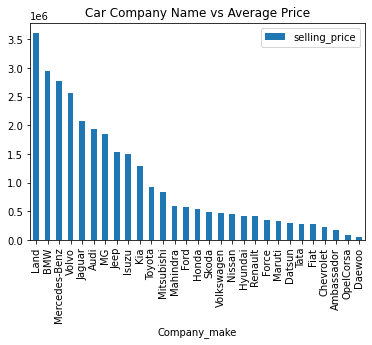

In [ ]:
plt.figure(figsize=(20, 6))

df_price_mean = pd.DataFrame(dataset.groupby(['Company_make'])['selling_price'].mean().sort_values(ascending = False))
df_price_mean.plot.bar()
plt.title('Car Company Name vs Average Price')
print(round(df_price_mean))
plt.show()

In [ ]:
df_price_mean.rename(columns={'selling_price':'price_mean'},inplace=True)

In [ ]:
dataset = dataset.merge(df_price_mean,on = 'Company_make',how = 'left')

In [ ]:
dataset['price_mean'].unique().mean()

1030736.9893513472

In [ ]:
#Our approximate mean was 1000000, so we can plot what values are above mean, below mean or just outliers(very high)
dataset['company_category'] = dataset['price_mean'].apply(lambda x : 0 if x < 1000000 else (1 if 1000000 <= x < 2500000 else 2))

In [ ]:
dataset["company_category"].value_counts()

0    4184
2      83
1      73
Name: company_category, dtype: int64

In [ ]:
#check the sorrelation of selling price
correlation.selling_price

year             0.413922
selling_price    1.000000
km_driven       -0.192289
Name: selling_price, dtype: float64

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['car_ID','price','Count_x','Count_y']]])

,variables,VIF
0,year,39.549933
1,selling_price,3.982761
2,km_driven,3.352927
3,assigned_car_values,86.563881
4,assigned_variant_values,85.182245
5,Count,10.786455
6,assigned_company_make_values,7.190821
7,price_mean,26.965253
8,company_category,10.248465


In [ ]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['car_ID','price','assigned_car_values','price_mean','Count_x','Count_y']]])

,variables,VIF
0,year,21.910655
1,selling_price,3.446138
2,km_driven,3.219920
3,assigned_variant_values,2.685475
4,Count,9.123366
5,assigned_company_make_values,6.965081
6,company_category,2.418594


In [ ]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['car_ID','price','assigned_car_values','price_mean','Count_x','Count_y','Count']]])

,variables,VIF
0,year,5.492277
1,selling_price,3.352019
2,km_driven,3.176481
3,assigned_variant_values,2.679122
4,assigned_company_make_values,2.943163
5,company_category,2.129427


In [ ]:
numerical_features = ['year','selling_price','km_driven','assigned_variant_values','assigned_company_make_values','company_category']

In [ ]:
dataset_pr = dataset.copy()
dataset_pr.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Company_make,variant,car,Count_x,assigned_car_values,Count_y,assigned_variant_values,Count,assigned_company_make_values,price_mean,company_category
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800,Maruti 800,59,20,59,20,1280,0,342416.295312,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon R,Maruti Wagon R,164,2,164,2,1280,0,342416.295312,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna,Hyundai Verna,129,4,129,4,821,1,419940.260658,0
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO,Datsun RediGO,15,70,15,70,37,14,297026.945946,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze,Honda Amaze,58,22,58,22,252,4,538146.781746,0


In [ ]:
#get list of all unique values of dataframe
column_list = categorical_features.values.tolist()
for column_name in column_list:
  print('\n',column_name,'\n',dataset[column_name].unique())


 name 
 ['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']

 fuel 
 ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']

 seller_type 
 ['Individual' 'Dealer' 'Trustmark Dealer']

 transmission 
 ['Manual' 'Automatic']

 owner 
 ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']

 Company_make 
 ['Maruti' 'Hyundai' 'Datsun' 'Honda' 'Tata' 'Chevrolet' 'Toyota' 'Jaguar'
 'Mercedes-Benz' 'Audi' 'Skoda' 'Jeep' 'BMW' 'Mahindra' 'Ford' 'Nissan'
 'Renault' 'Fiat' 'Volkswagen' 'Volvo' 'Mitsubishi' 'Land' 'Daewoo' 'MG'
 'Force' 'Isuzu' 'OpelCorsa' 'Ambassador' 'Kia']

 variant 
 ['800' 'Wagon R' 'Verna' 'RediGO' 'Amaze' 'Alto' 'Xcent' 'Indigo' 'Creta'
 'Celerio' 'Sail' 'Corolla' 'Ciaz' 'Venue' 'Enjoy' 'XF' 'New' 'Vitara'
 'Q5' 'City' 'Tigor' 'A6' 'Superb' 'Innova' 'Compass' 'E-Class' 'i10' '3'
 'Q7' 'Elantra' 'Scorpio' 'Santro' 'Grand' 'Sw

In [ ]:
#new dataset formed
dataset_pr.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Company_make,variant,car,Count_x,assigned_car_values,Count_y,assigned_variant_values,Count,assigned_company_make_values,price_mean,company_category
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800,Maruti 800,59,20,59,20,1280,0,342416.295312,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon R,Maruti Wagon R,164,2,164,2,1280,0,342416.295312,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna,Hyundai Verna,129,4,129,4,821,1,419940.260658,0
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO,Datsun RediGO,15,70,15,70,37,14,297026.945946,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze,Honda Amaze,58,22,58,22,252,4,538146.781746,0


In [ ]:
dataset_pr = pd.get_dummies(dataset_pr, columns=["fuel","seller_type","transmission",'owner'], prefix=["fuel","seller","trans",'own'])
# dataset_pr[dataset_pr['trans_Automatic'] == 1]


In [ ]:
dataset_pr.head()

,name,year,selling_price,km_driven,Company_make,variant,car,Count_x,assigned_car_values,Count_y,assigned_variant_values,Count,assigned_company_make_values,price_mean,company_category,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_Dealer,seller_Individual,seller_Trustmark Dealer,trans_Automatic,trans_Manual,own_First Owner,own_Fourth & Above Owner,own_Second Owner,own_Test Drive Car,own_Third Owner
0,Maruti 800 AC,2007,60000,70000,Maruti,800,Maruti 800,59,20,59,20,1280,0,342416.295312,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Maruti,Wagon R,Maruti Wagon R,164,2,164,2,1280,0,342416.295312,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Hyundai,Verna,Hyundai Verna,129,4,129,4,821,1,419940.260658,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,Datsun,RediGO,Datsun RediGO,15,70,15,70,37,14,297026.945946,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Honda,Amaze,Honda Amaze,58,22,58,22,252,4,538146.781746,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0


In [ ]:
dataset_pr.corr()

,year,selling_price,km_driven,Count_x,assigned_car_values,Count_y,assigned_variant_values,Count,assigned_company_make_values,price_mean,company_category,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_Dealer,seller_Individual,seller_Trustmark Dealer,trans_Automatic,trans_Manual,own_First Owner,own_Fourth & Above Owner,own_Second Owner,own_Test Drive Car,own_Third Owner
year,1.000000,0.413922,-0.419688,-0.030974,0.051538,-0.031417,0.057284,-0.087634,0.070124,0.073352,0.051361,0.008792,0.121424,-0.025540,-0.051266,-0.114908,0.143464,-0.173703,0.100225,0.143800,-0.143800,0.438897,-0.186361,-0.292349,0.095795,-0.244308
selling_price,0.413922,1.000000,-0.192289,-0.199410,0.335210,-0.198966,0.327365,-0.267996,0.387475,0.714053,0.662210,-0.037839,0.282947,-0.005095,-0.042434,-0.269453,0.205111,-0.236798,0.110176,0.530205,-0.530205,0.223889,-0.078725,-0.161986,0.048799,-0.111326
km_driven,-0.419688,-0.192289,1.000000,0.014619,-0.034941,0.014756,-0.036437,-0.080541,0.023103,0.001707,-0.055937,0.002107,0.285396,-0.001372,0.036652,-0.291139,-0.156465,0.182663,-0.089858,-0.120226,0.120226,-0.299731,0.097349,0.195203,-0.083445,0.194713
Count_x,-0.030974,-0.199410,0.014619,1.000000,-0.648224,0.999541,-0.650103,0.615802,-0.485819,-0.234256,-0.170557,0.007460,-0.154830,-0.014900,0.012977,0.152003,-0.083653,0.063871,0.048862,-0.166399,0.166399,-0.034020,-0.002112,0.038605,-0.035157,0.007280
assigned_car_values,0.051538,0.335210,-0.034941,-0.648224,1.000000,-0.645484,0.989154,-0.461247,0.570949,0.349834,0.362984,-0.020438,0.182636,0.038517,-0.037990,-0.174418,0.048685,-0.039284,-0.022379,0.249302,-0.249302,0.041364,0.008847,-0.048821,0.022369,-0.003980
Count_y,-0.031417,-0.198966,0.014756,0.999541,-0.645484,1.000000,-0.651274,0.615620,-0.484144,-0.232738,-0.168166,0.007268,-0.155036,-0.014942,0.012837,0.152267,-0.083618,0.063934,0.048582,-0.165500,0.165500,-0.034794,-0.002242,0.039120,-0.035312,0.007952
assigned_variant_values,0.057284,0.327365,-0.036437,-0.650103,0.989154,-0.651274,1.000000,-0.461285,0.559822,0.334242,0.343112,-0.020047,0.183679,0.039606,-0.037622,-0.175623,0.050343,-0.041063,-0.021878,0.246152,-0.246152,0.046728,0.007687,-0.052556,0.023334,-0.007231
Count,-0.087634,-0.267996,-0.080541,0.615802,-0.461247,0.615620,-0.461285,1.000000,-0.794779,-0.375317,-0.238822,0.099990,-0.343453,-0.014373,0.065565,0.315323,-0.135606,0.098602,0.093363,-0.194542,0.194542,-0.024352,0.049164,0.018935,-0.056633,0.000894
assigned_company_make_values,0.070124,0.387475,0.023103,-0.485819,0.570949,-0.484144,0.559822,-0.794779,1.000000,0.542641,0.506901,-0.068721,0.241445,0.009959,-0.048369,-0.221635,0.155812,-0.126816,-0.068497,0.321343,-0.321343,0.026150,-0.030861,-0.012077,0.030222,-0.019199
price_mean,0.073352,0.714053,0.001707,-0.234256,0.349834,-0.232738,0.334242,-0.375317,0.542641,1.000000,0.927396,-0.035096,0.222524,0.015444,-0.024623,-0.212753,0.193043,-0.180996,-0.016383,0.532350,-0.532350,0.050868,-0.034582,-0.035144,0.007350,-0.018359


In [ ]:
dataset_pr['selling_price'].astype(float)
dataset_pr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4340 entries, 0 to 4339
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          4340 non-null   object 
 1   year                          4340 non-null   int64  
 2   selling_price                 4340 non-null   int64  
 3   km_driven                     4340 non-null   int64  
 4   Company_make                  4340 non-null   object 
 5   variant                       4340 non-null   object 
 6   car                           4340 non-null   object 
 7   Count_x                       4340 non-null   int64  
 8   assigned_car_values           4340 non-null   int64  
 9   Count_y                       4340 non-null   int64  
 10  assigned_variant_values       4340 non-null   int64  
 11  Count                         4340 non-null   int64  
 12  assigned_company_make_values  4340 non-null   int64  
 13  pri

4.0

In [ ]:
#using all the required numerical and encoded features relevant for us
features = dataset_pr.drop(['name','Company_make','variant'],axis =1).columns
# y = dataset_pr['selling_price'].apply(zscore)
features = dataset_pr.describe()
features = features.columns.drop(['Count_x','Count','Count_y','price_mean','assigned_car_values'])
#using zscore on all values
dataset_zscore = (dataset_pr[features]-dataset_pr[features].mean())/dataset_pr[features].std()
#assign column names to new dataset
dataset_zscore.columns = [features + '_z_score']
features = (dataset_pr[features])
new_df = pd.concat([dataset_zscore, features], axis=1)
dat_no_outliers = dataset_zscore[(dataset_zscore < 3) & (dataset_zscore > -3)]

#getting indices of outliers
rows_with_nan = []
for index, row in dat_no_outliers.iterrows():
    is_nan_series = row.isnull()
    if is_nan_series.any():
        rows_with_nan.append(index)
print(rows_with_nan)

# removing the rows of particular indices

# features = features.drop(features.index[rows_with_nan])
# features
features

[9, 22, 27, 29, 30, 32, 35, 36, 40, 41, 42, 43, 44, 51, 61, 69, 70, 74, 75, 76, 82, 89, 94, 96, 99, 101, 102, 103, 105, 113, 114, 125, 132, 137, 157, 160, 163, 169, 170, 173, 176, 191, 194, 195, 196, 197, 198, 200, 204, 213, 218, 221, 222, 225, 236, 252, 271, 314, 318, 320, 322, 323, 324, 330, 332, 333, 340, 344, 351, 352, 353, 361, 372, 373, 374, 381, 391, 394, 400, 401, 403, 404, 409, 424, 431, 439, 455, 483, 494, 495, 502, 512, 525, 527, 536, 539, 540, 541, 542, 544, 545, 546, 547, 548, 549, 551, 553, 554, 555, 559, 560, 563, 564, 566, 569, 570, 572, 573, 574, 578, 579, 582, 583, 585, 588, 589, 591, 592, 593, 597, 598, 601, 602, 604, 607, 608, 610, 611, 612, 616, 617, 620, 621, 623, 626, 627, 631, 648, 656, 657, 658, 659, 664, 665, 666, 671, 673, 692, 696, 703, 706, 712, 721, 729, 731, 736, 770, 782, 816, 817, 818, 820, 822, 824, 826, 836, 850, 851, 853, 863, 864, 868, 878, 898, 899, 900, 904, 905, 908, 909, 911, 914, 915, 917, 918, 919, 923, 924, 927, 928, 930, 933, 934, 955, 957, 

,year,selling_price,km_driven,assigned_variant_values,assigned_company_make_values,company_category,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_Dealer,seller_Individual,seller_Trustmark Dealer,trans_Automatic,trans_Manual,own_First Owner,own_Fourth & Above Owner,own_Second Owner,own_Test Drive Car,own_Third Owner
0,2007,60000,70000,20,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
1,2007,135000,50000,2,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
2,2012,600000,100000,4,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0
3,2017,250000,46000,70,14,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
4,2014,450000,141000,22,4,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,3,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
4336,2014,409999,80000,3,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
4337,2009,110000,83000,20,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0
4338,2016,865000,90000,24,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0


In [ ]:
# #assign X and Y
# X = features.drop(['selling_price'], axis = 1)
# Y = features .selling_price
# print(len(X),len(Y))
# X

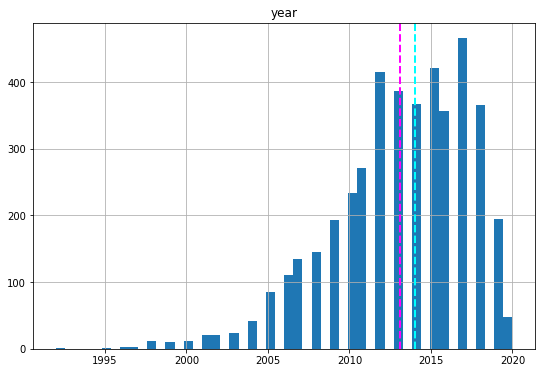

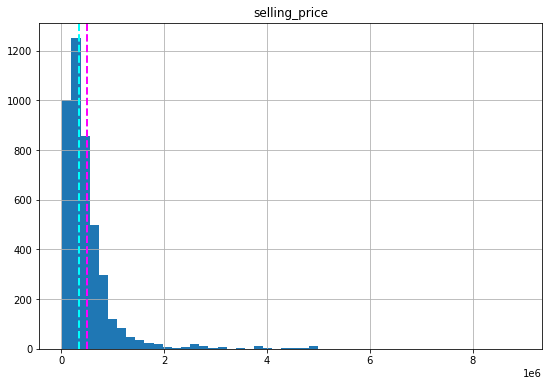

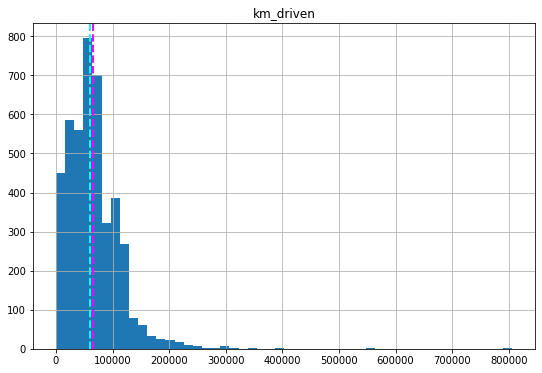

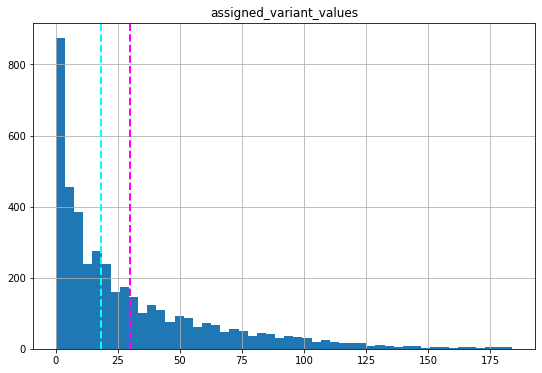

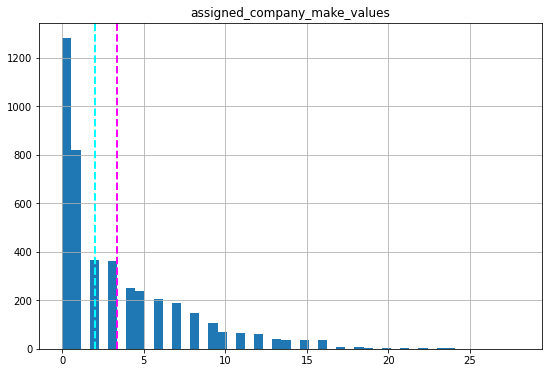

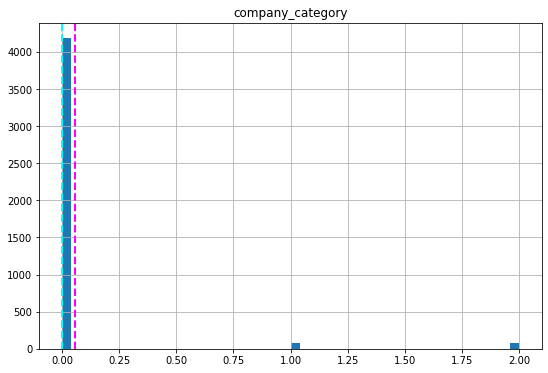

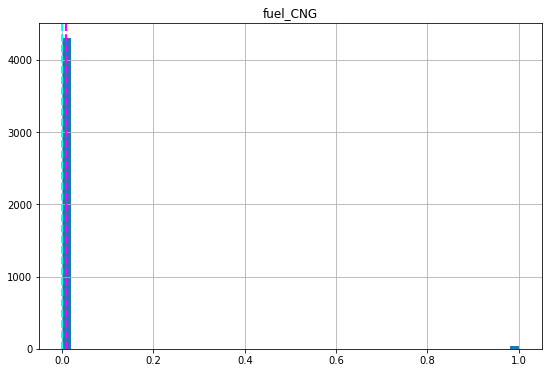

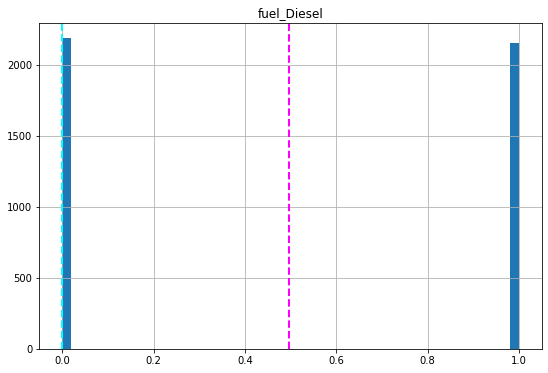

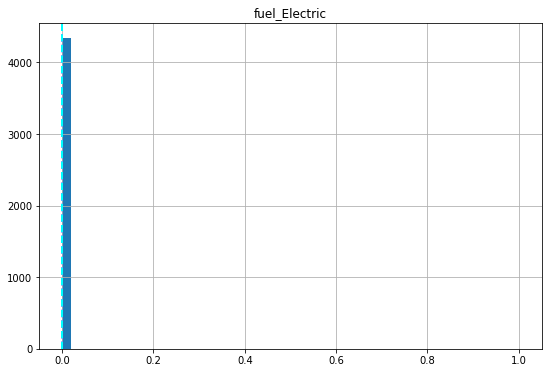

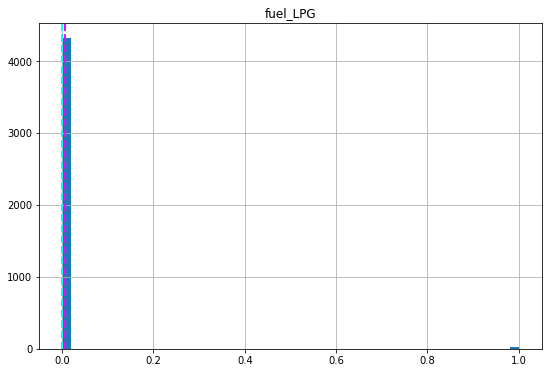

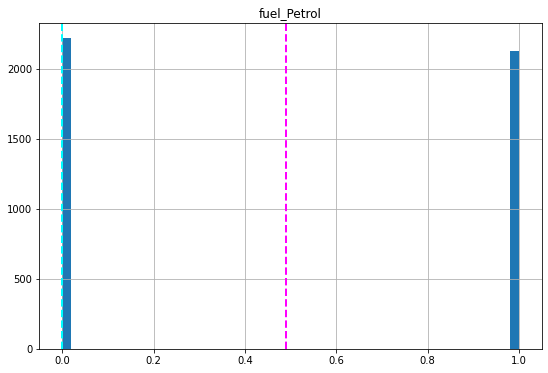

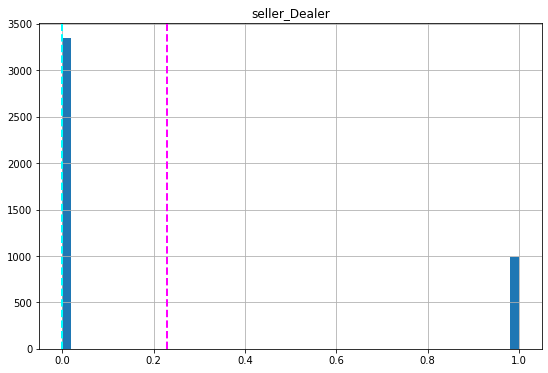

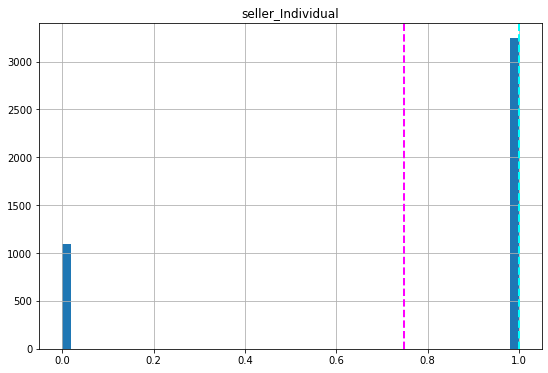

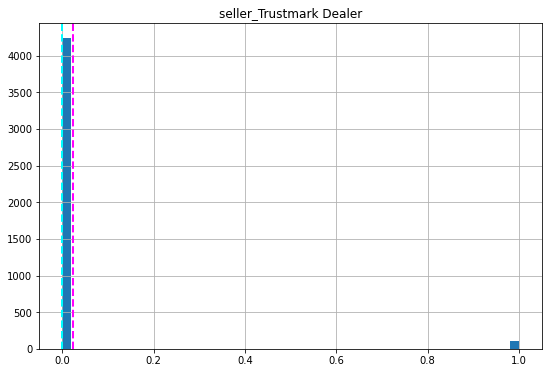

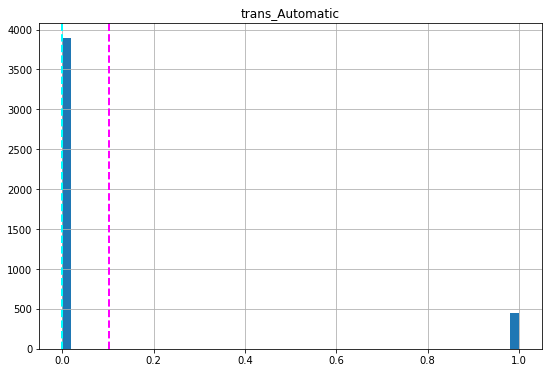

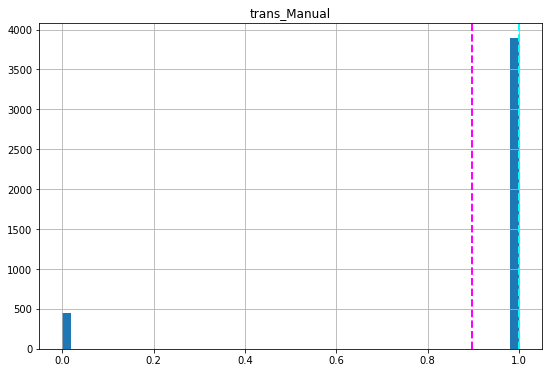

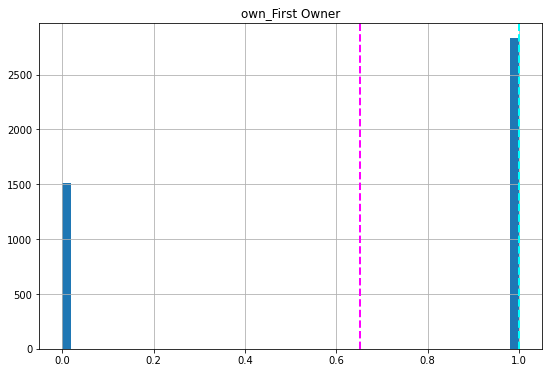

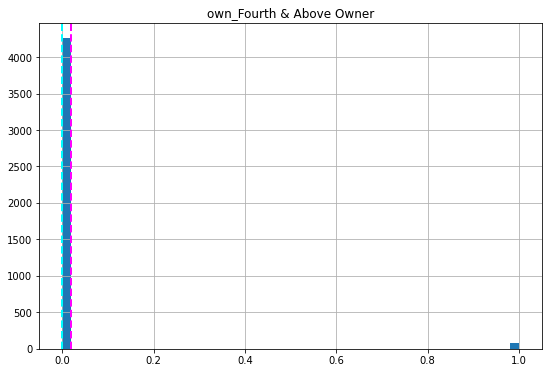

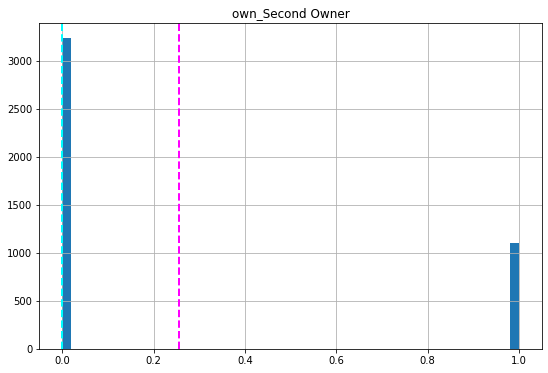

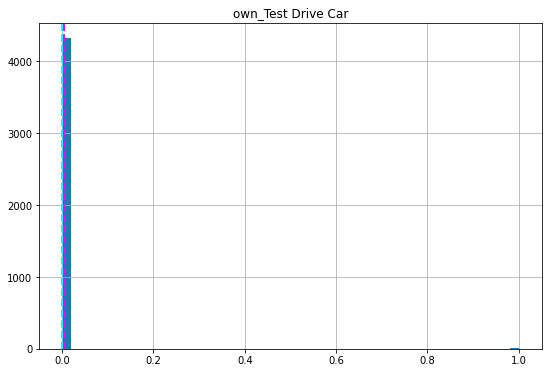

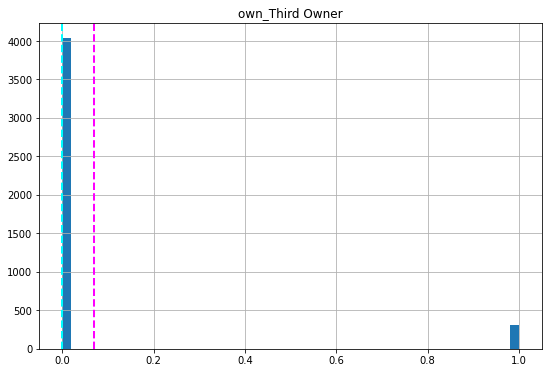

In [ ]:
#@title Default title text
# plot a bar plot for each numerical feature count except year

for col in features[::]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset_pr[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [ ]:
from scipy.stats import zscore
#Train test split
# numeric_cols = carprice.select_dtypes(include=[np.number]).columns
X = features.drop(['selling_price'], axis = 1).apply(zscore)



20

In [ ]:
Y = np.log10(features['selling_price'])


In [ ]:
# print("We remove ",4340-3549,"Outliers with zscore greater than 3")

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=42)

X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values



In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

0.7296086778819298

In [ ]:
reg.coef_

array([ 2.11271358e-01, -3.79133915e-03,  1.53148483e-02,  4.25402595e-04,
        7.62848571e-02, -6.07640131e+10, -3.17927893e+11, -9.65110522e+09,
       -4.61675861e+10, -3.17863067e+11,  1.16573068e+12,  1.20527948e+12,
        4.20264423e+11, -6.58939559e+11, -6.58939559e+11,  4.84229171e+12,
        1.37625840e+12,  4.43150481e+12,  6.35214981e+11,  2.59547007e+12])

In [ ]:
len(reg.coef_)

20

In [ ]:
reg.intercept_

5.545021923694266

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
y_pred

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df['accuracy'] = df['Predicted'] - df['Actual']

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(10**(y_test),10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 116113579796.76949
RMSE : 340754.42740596854


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.6072744265948121
Adjusted R2 :  0.6011428797813041


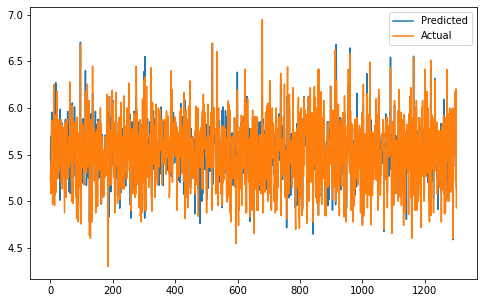

In [ ]:
plt.figure(figsize=(8,5))
plt.plot((y_pred))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
#Trying to check the accuracy percentage after implmenting it
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df['inaccuracy'] = df['Predicted'] - df['Actual']
# Reducing the mean differences to help us check the actual accuracy as it helps me to ignore signs 
df['inacc_std'] = df['inaccuracy']-df['inaccuracy'].std()
#Getting the percentge of accuracy
df['inacc%'] = df['inacc_std']/df['Predicted']
#sort
print('On average we are 20% inaccurate in making prediction.')
df.sort_values(by=['inacc%'], ascending = True)


On average we are 20% inaccurate in making prediction.


,Actual,Predicted,inaccuracy,inacc_std,inacc%
1141,5.612783,4.805764,-0.807019,-1.004307,-0.208980
479,5.397940,4.760842,-0.637098,-0.834386,-0.175260
64,5.740363,5.083108,-0.657255,-0.854543,-0.168114
679,6.949390,6.122170,-0.827220,-1.024508,-0.167344
539,6.000000,5.373147,-0.626853,-0.824141,-0.153381
...,...,...,...,...,...
128,4.602060,5.302346,0.700286,0.502998,0.094863
184,4.301030,5.015725,0.714695,0.517407,0.103157
653,4.653213,5.439553,0.786341,0.589053,0.108291
1094,4.653213,5.439553,0.786341,0.589053,0.108291


Here we subtracted std from inaccuracy to scale the values and then got a new col inacc_std. Then got 20% mean of this column which states overall we are 20% wrong in our predictions.

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso.score(X_train, y_train)

0.7297606546295516

In [ ]:
lasso.coef_

array([ 2.11032978e-01, -3.28688301e-03,  1.55694149e-02, -5.12595652e-04,
        7.73771344e-02, -4.61042347e-03,  9.77641767e-02,  2.29234285e-03,
       -3.76106487e-03, -0.00000000e+00,  0.00000000e+00, -2.30534449e-02,
        2.81913753e-02,  6.27803283e-02, -2.76697143e-15,  4.93526919e-03,
       -6.14213790e-03, -0.00000000e+00,  6.69175902e-03, -7.60034187e-03])

In [ ]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
lasso_regressor.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean absolute error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0014}

Using  {'alpha': 0.0014}  the negative mean absolute error is:  -0.03612079248292764


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)
y_pred_lasso_train = lasso_regressor.predict(X_train)

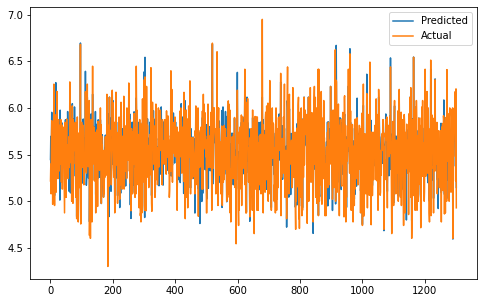

In [ ]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_lasso))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
#MSE of  test
MSE  = mean_squared_error(10**(y_test),10**(y_pred_lasso))
print("MSE :" , MSE)

#RMSE of  test
RMSE = np.sqrt(MSE)
print("\nRMSE :" ,RMSE)
#R2 and adj R2 of test
r2 = r2_score(10**(y_test), 10**(y_pred_lasso))

print("\nR2 :" ,r2)
print("\nAdjusted R2 : ",1-(1-r2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))


MSE : 116220641534.86867

RMSE : 340911.4863639368

R2 : 0.6069123166455853

Adjusted R2 :  0.6007751162809574


In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 10}

Using  {'alpha': 10}  the negative mean squared error is:  -0.03624758343124119


In [ ]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 116304001813.34074
RMSE : 341033.7253312944
R2 : 0.6066303710435337
Adjusted R2 :  0.6004887687179058


In [ ]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
elasticnet.score(X_train, y_train)

0.6541989598824772

In [ ]:
y_pred_en = elasticnet.predict(X_test)


In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 174055005661.8155
RMSE : 417199.0000728855
R2 : 0.4113018303094166
Adjusted R2 :  0.4021106020550749


In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001, 'l1_ratio': 0.8}

Using  {'alpha': 0.001, 'l1_ratio': 0.8}  the negative mean squared error is:  -0.03612511850636776


In [ ]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_elastic))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 116261159359.33281
RMSE : 340970.9069104471
R2 : 0.6067752750878823
Adjusted R2 :  0.60063593512048


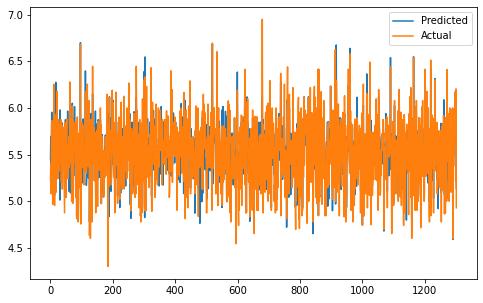

In [ ]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_elastic))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

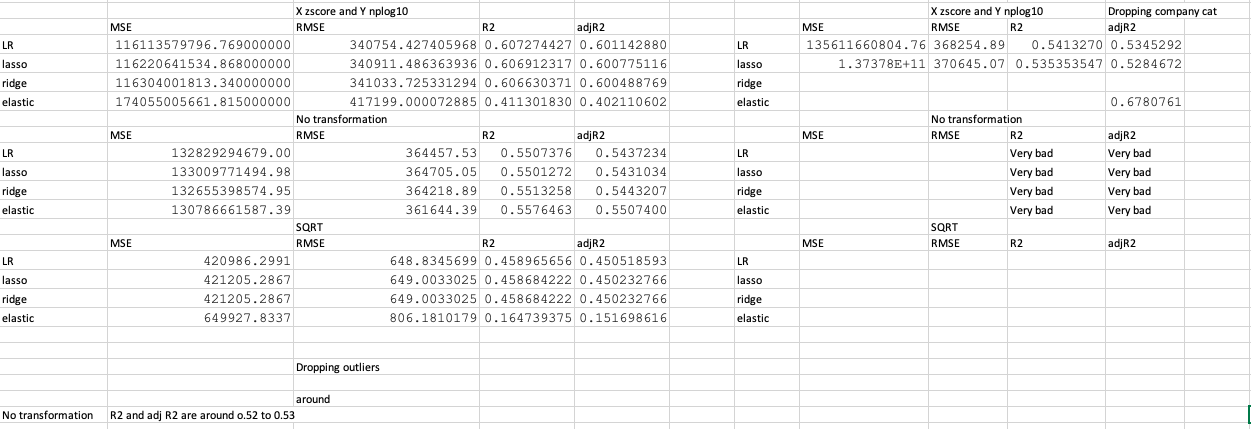

###Conclusion : I tried multiple analysis with outliers, without outliers, and with company_category(specific value assigned acc to mean) and without company category and also calculated RMSE, MSE, R2, Adj R2 in Linear regression, ridge, lasso, elastic. After dropping company category there was a sudden increase in adj R2 in elastic regression and after dropping outliers, our R2 was 0.6. Which shows that these outliers might play a significant role in prediction. So with outliers and our specific columns taken, we got highest R2 in linear regression by applying Zscore on Prediction variables and nplog10 on target variable. Here we got 0.672 R2 which shows the model will be fairly acceptable not the best. and as we have done cross validation in all steps so there are a few chances of underfitting and over fitting.